In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
CC = pd.read_csv('C:/Users/nirosha.giddanagari/DSP Practice/DataSets/CC_GENERAL.csv')

In [3]:
CC.dtypes
CC.drop(['CUST_ID'], axis=1, inplace=True)
CC.fillna(0, inplace=True)

In [4]:
CC.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
CC['MONTHLY_AVG_PURCHASE'] = CC['PURCHASES']/CC['TENURE']
CC['MONTHLY_AVG_CASH_ADVANCE'] = CC['CASH_ADVANCE']/CC['TENURE']
CC['PURCHASE_TYPE_OFF_PAY'] = np.where(CC['ONEOFF_PURCHASES']>0,1,0)
CC['PURCHASE_TYPE_INSTALLMENT'] = np.where(CC['INSTALLMENTS_PURCHASES']>0,1,0)
CC['PURCHASE_TYPE_BOTH'] = np.where(CC['PURCHASE_TYPE_OFF_PAY']+CC['PURCHASE_TYPE_INSTALLMENT'] > 2,1,0)
CC['LIMIT_USAGE'] = np.where(CC['CREDIT_LIMIT']== 0, 0,CC['BALANCE']/CC['CREDIT_LIMIT'])
CC['PAYMENT_RATIO'] = np.where(CC['MINIMUM_PAYMENTS']== 0, 0, CC['PAYMENTS']/CC['MINIMUM_PAYMENTS'])

In [11]:
CC.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,PURCHASE_TYPE_OFF_PAY,PURCHASE_TYPE_INSTALLMENT,PURCHASE_TYPE_BOTH,LIMIT_USAGE,PAYMENT_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.000000,12,7.950000,0.000000,0,1,0,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1072.340217,0.222222,12,0.000000,536.912124,0,0,0,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,627.284787,0.000000,12,64.430833,0.000000,1,0,0,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,0.000000,12,124.916667,17.149001,1,0,0,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.000000,12,1.333333,0.000000,1,0,0,0.681429,2.771075


In [18]:
CC_New = CC.iloc[:,[10, 11, 17, 18, 19, 20, 21, 22,23]]
CC_New.head()

,CASH_ADVANCE_TRX,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,PURCHASE_TYPE_OFF_PAY,PURCHASE_TYPE_INSTALLMENT,PURCHASE_TYPE_BOTH,LIMIT_USAGE,PAYMENT_RATIO
0,0,2,7.950000,0.000000,0,1,0,0.040901,1.446508
1,4,0,0.000000,536.912124,0,0,0,0.457495,3.826241
2,0,12,64.430833,0.000000,1,0,0,0.332687,0.991682
3,1,1,124.916667,17.149001,1,0,0,0.222223,0.000000
4,0,1,1.333333,0.000000,1,0,0,0.681429,2.771075


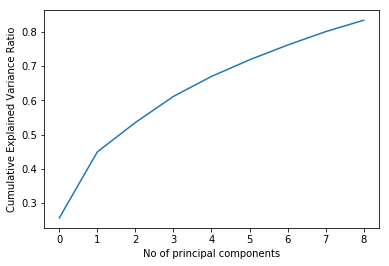

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit_transform(CC)
from sklearn.decomposition import PCA
pc = PCA(n_components=9).fit(sc)
p = pd.Series(pc.explained_variance_ratio_.cumsum()).plot()
p.set_xlabel('No of principal components')
p.set_ylabel('Cumulative Explained Variance Ratio')
plt.show()

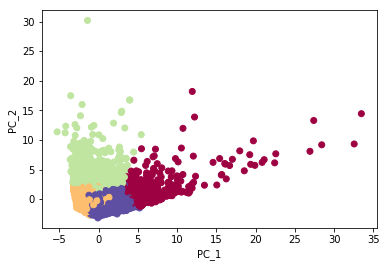

In [29]:
pc = PCA(n_components=8, random_state=125).fit_transform(sc)
from sklearn.cluster import KMeans, DBSCAN
km = KMeans(n_clusters=4, random_state=185).fit(pc)
plt.scatter(pc[:,0], pc[:,1], c=km.labels_, cmap='Spectral')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.show()

In [30]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score

In [31]:
# calculate SC for K=2 through K=10
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit_transform(pc)
    scores.append(silhouette_score(pc,km.labels_))

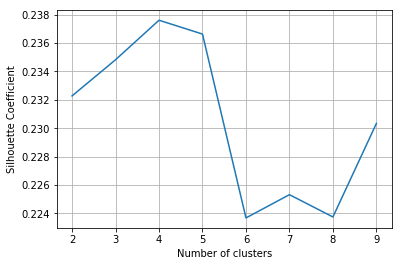

In [32]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [34]:
# calculate SC for K=2 through K=10
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit_transform(pc)
    scores.append(calinski_harabaz_score(pc,km.labels_))

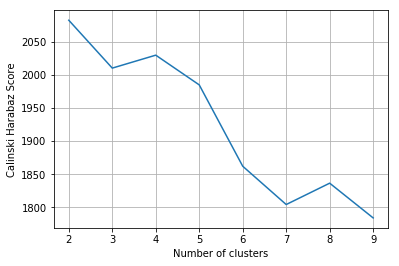

In [35]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabaz Score')
plt.grid(True)

In [37]:
# calculate SC for K=2 through K=10
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit_transform(pc)
    scores.append(km.inertia_)

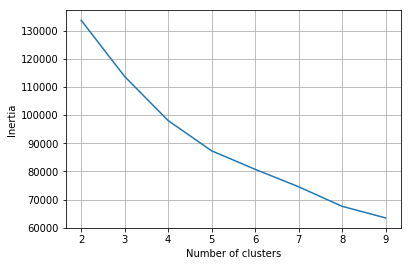

In [38]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)

In [39]:
km = KMeans(n_clusters=4, random_state=125).fit(pc)
CC_New['cluster']=km.labels_
CC_New.groupby('cluster').mean().T

C:\Users\nirosha.giddanagari\DSP\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


cluster,0,1,2,3
CASH_ADVANCE_TRX,0.814777,15.021380,2.019465,2.675593
PURCHASES_TRX,20.148535,8.133139,86.372263,2.427336
MONTHLY_AVG_PURCHASE,95.294426,48.003575,651.151349,22.376093
MONTHLY_AVG_CASH_ADVANCE,18.025589,465.040817,54.463754,62.675289
PURCHASE_TYPE_OFF_PAY,0.561274,0.446064,0.968370,0.442957
PURCHASE_TYPE_INSTALLMENT,0.948790,0.348882,0.917275,0.160112
PURCHASE_TYPE_BOTH,0.000000,0.000000,0.000000,0.000000
LIMIT_USAGE,0.265624,0.635655,0.372494,0.454880
PAYMENT_RATIO,10.886740,5.441180,14.522333,7.380321


In [40]:
# No. of customers in the cluster
CC_New['cluster'].value_counts()

0    3925
3    3585
1    1029
2     411
Name: cluster, dtype: int64

Text(0,0.5,'PAYMENT_RATIO')

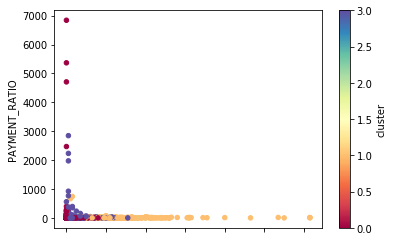

In [41]:
d = CC_New.plot.scatter(x='CASH_ADVANCE_TRX', y='PAYMENT_RATIO', c='cluster', cmap='Spectral')
d.set_xlabel('CASH_ADVANCE_TRX')
d.set_ylabel('PAYMENT_RATIO')

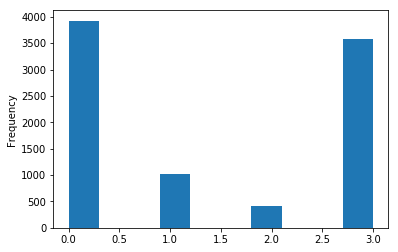

In [42]:
CC_New['cluster'].plot.hist()

In [43]:
l = CC_New.groupby('cluster').mean()

C:\Users\nirosha.giddanagari\DSP\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\nirosha.giddanagari\DSP\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\nirosha.giddanagari\DSP\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\nirosha.giddanagari\DSP\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

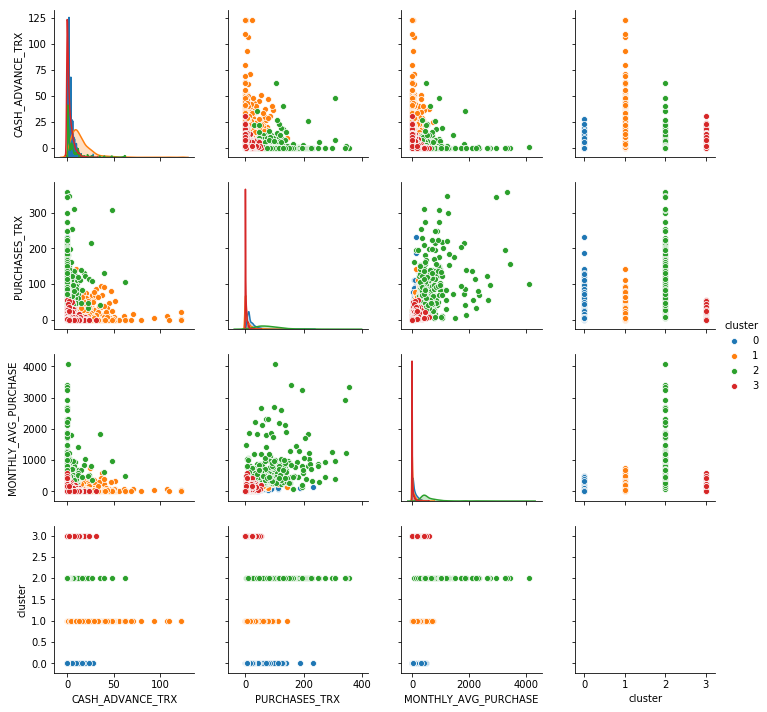

In [46]:
import seaborn as sns
sns.pairplot(CC_New.iloc[:,[0, 1, 2, 9]], hue='cluster')

C:\Users\nirosha.giddanagari\DSP\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\nirosha.giddanagari\DSP\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\nirosha.giddanagari\DSP\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\nirosha.giddanagari\DSP\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

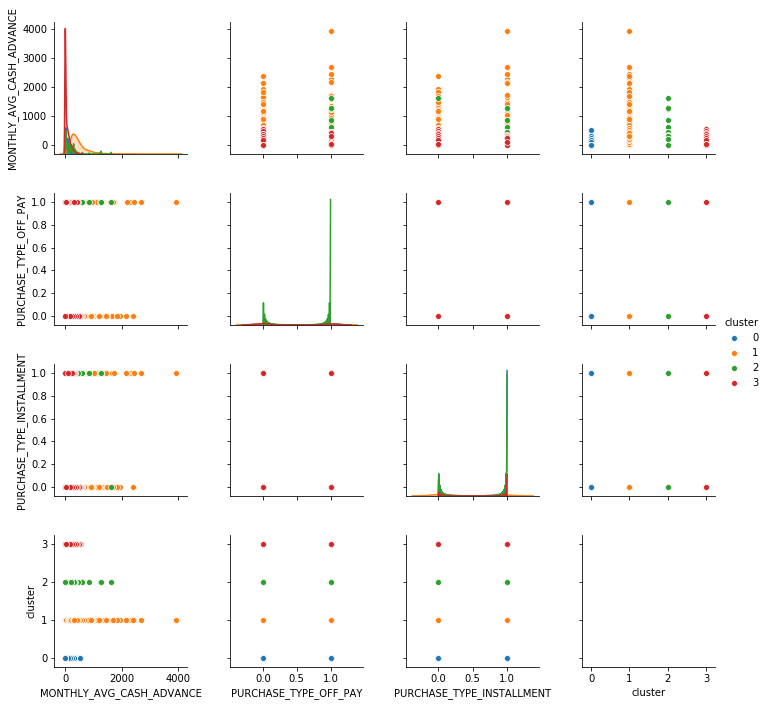

In [47]:
import seaborn as sns
sns.pairplot(CC_New.iloc[:,[3, 4, 5, 9]], hue='cluster')

C:\Users\nirosha.giddanagari\DSP\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\nirosha.giddanagari\DSP\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\nirosha.giddanagari\DSP\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\nirosha.giddanagari\DSP\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

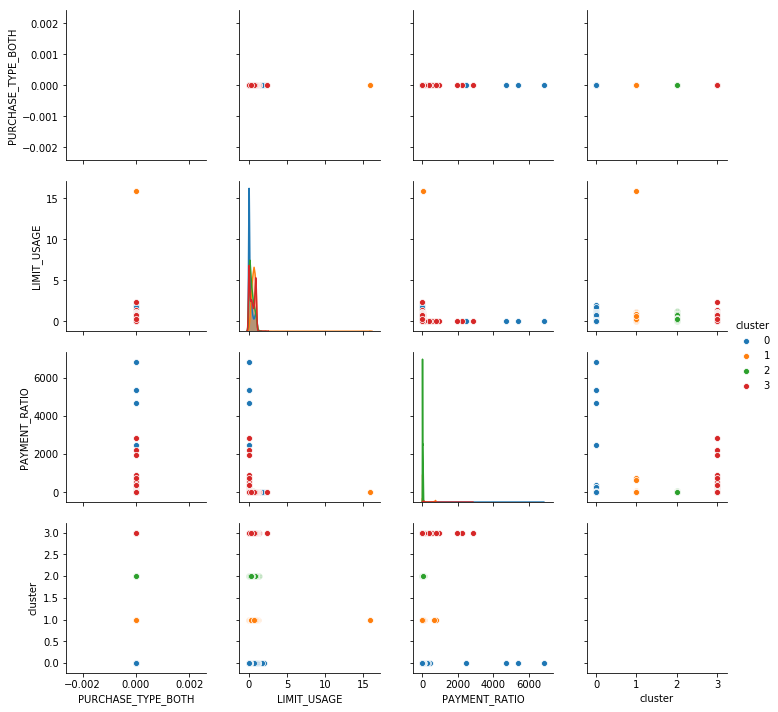

In [49]:
import seaborn as sns
sns.pairplot(CC_New.iloc[:,[6, 7, 8, 9]], hue='cluster')

In [53]:
abc = pd.read_csv('C:/Users/nirosha.giddanagari/DSP Practice/DataSets/CC_GENERAL.csv')
x = pd.concat([pd.DataFrame(abc.iloc[:,0], columns=['CUST_ID']), CC_New], axis=1)

In [54]:
x.to_csv('grouped customers.csv', index=0)